In [16]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import scipy

def functs4(snr):
    
    #%% Variables   

    fs = 1000
    N = 1000    

    SNR = snr #db    

    n_pruebas = 200 

    omega0 = fs/4 #mitad de banda   

    a1 = np.sqrt(2) 

    pot_ruido_analog = 10**(-SNR/10)    

    ver = -10 * np.log(pot_ruido_analog)    

    #%% Señal   

    ts=1/fs
    df=fs/N
        
    ## Tiempo ##    

    tt = np.linspace(0, (N-1)*ts, N).reshape((N,1))
    tt = np.tile(tt, n_pruebas) 

    fr = np.random.uniform(-1/2, 1/2, size = (1,n_pruebas)) 

    omega1 = omega0 + fr*(df)   

    ## Argumento ## 

    arg = (omega1 * tt) 

    xx = a1*np.sin(2*np.pi*omega1*tt)   

    #%% Normalizo   

    xn = xx/np.std(xx)  

    nn =  np.random.normal(0, np.sqrt(pot_ruido_analog), N).reshape((N,1)) # señal de ruido de analógico    

    analog_sig = xn # señal analógica sin ruido 

    sr = analog_sig + nn # señal analógica de entrada al ADC (con ruido analógico)  

    #plt.figure(2)
    ft_As = 1/N * np.fft.fft(sr, axis=0)
    ff = np.linspace(0, (N-1)*df, N) # grilla de sampleo frecuencial
    bfrec = ff <= fs/2  

    #plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As[bfrec])**2), label='$ s $ (sig.)', marker = 'x' )
    #plt.show()  

    #%% Ventanas a usar 

    #Blackman
    #Flatop
    #no hacer nada --> Rectangular
    #Alguna otra que quiera 

    window1 = scipy.signal.windows.blackmanharris(N).reshape((N,1))
    window2 = scipy.signal.windows.flattop(N).reshape((N,1))
    window3 = scipy.signal.windows.bohman(N).reshape((N,1)) 

    sw1 = window1 * sr
    sw2 = window2 * sr
    sw3 = window3 * sr  

    #plt.figure(3)   

    Sn1 =  1/N * np.fft.fft(sw1, axis=0)
    Sn2 =  1/N * np.fft.fft(sw2, axis=0)
    Sn3 =  1/N * np.fft.fft(sw3, axis=0)    

    #plt.plot( ff[bfrec], 10* np.log10(2*np.abs(Sn1[bfrec])**2), label='$ s $ (sig.)', marker = 'x' )
    #plt.plot( ff[bfrec], 10* np.log10(2*np.abs(Sn2[bfrec])**2), label='$ s $ (sig.)', marker = 'x' )
    #plt.plot( ff[bfrec], 10* np.log10(2*np.abs(Sn3[bfrec])**2), label='$ s $ (sig.)', marker = 'x' )    

    #plt.show()  

    a1_1 = Sn1[250,:]
    a1_2 = Sn2[250,:]
    a1_3 = Sn3[250,:]
    a1_4 = ft_As[250,:] 

    plt.figure(4)   

    plt.hist(abs(a1_1), bins = 10, label = 'BlackMan', alpha =  0.5)
    plt.hist(abs(a1_2), bins = 10, label = 'Flattop', alpha =  0.5)
    plt.hist(abs(a1_3), bins = 10, label = 'Bohman', alpha =  0.5)
    plt.hist(abs(a1_4), bins = 10, label = 'Rectangular', alpha =  0.5)

    plt.title('Estimadores de a')     

    plt.legend()    

    plt.show()  

    #%% Estimador omega 

    k1 = np.argmax(abs(Sn1[bfrec]), axis = 0)
    omega1_est = np.abs(k1) * df    

    k2 = np.argmax(abs(Sn2[bfrec]), axis = 0)
    omega2_est = np.abs(k2) * df    

    k3 = np.argmax(abs(Sn3[bfrec]), axis = 0)
    omega3_est = np.abs(k3) * df    

    k4 = np.argmax(abs(ft_As[bfrec]), axis = 0)
    omega4_est = np.abs(k4) * df    

    plt.figure(5)   

    plt.hist(omega1_est, bins = 10, label = 'BlackMan', alpha =  0.5)
    plt.hist(omega2_est, bins = 10, label = 'Flattop', alpha =  0.5)
    plt.hist(omega3_est, bins = 10, label = 'Bohman', alpha =  0.5)
    plt.hist(omega4_est, bins = 10, label = 'Rectangular', alpha =  0.5)
    
    plt.title('Estimadores de omega')     
    
    plt.legend()    

    plt.show()  

    #%% Sesgo y varianza    

    sesgo1_a = np.mean(abs(a1_1 - a1))
    sesgo2_a = np.mean(abs(a1_2 - a1))
    sesgo3_a = np.mean(abs(a1_3 - a1))
    sesgo4_a = np.mean(abs(a1_4 - a1))  

    var1_a = np.var(a1_1)
    var2_a = np.var(a1_2)
    var3_a = np.var(a1_3)
    var4_a = np.var(a1_4)   

    sesgo1_o = np.mean(abs(omega1_est - omega1))
    sesgo2_o = np.mean(abs(omega2_est - omega1))
    sesgo3_o = np.mean(abs(omega3_est - omega1))
    sesgo4_o = np.mean(abs(omega4_est - omega1))    

    var1_o = np.mean((abs(omega1_est - omega1)**2))
    var2_o = np.mean((abs(omega2_est - omega1)**2))
    var3_o = np.mean((abs(omega3_est - omega1)**2))
    var4_o = np.mean((abs(omega4_est - omega1)**2)) 

    #%% Tablas  

    print("Blackman Harris: ")
    print("          ♦ Estimador a = ", np.mean(abs(a1_1)))
    print("               Sesgo = ", sesgo1_a)
    print("               Varianza = ", var1_a)
    print("          ♦ Estimador omega1 = ", np.mean(abs(omega1_est)))
    print("               Sesgo = ", sesgo1_o)
    print("               Varianza = ", var1_o) 

    print("\nFlattop: ")
    print("          ♦ Estimador a = ", np.mean(abs(a1_2)))
    print("               Sesgo = ", sesgo2_a)
    print("               Varianza = ", var2_a)
    print("          ♦ Estimador omega1 = ", np.mean(abs(omega2_est)))
    print("               Sesgo = ", sesgo2_o)
    print("               Varianza = ", var2_o) 

    print("\nBohman: ")
    print("          ♦ Estimador a = ", np.mean(abs(a1_3)))
    print("               Sesgo = ", sesgo3_a)
    print("               Varianza = ", var3_a)
    print("          ♦ Estimador omega1 = ", np.mean(abs(omega3_est)))
    print("               Sesgo = ", sesgo3_o)
    print("               Varianza = ", var3_o) 

    print("\nRectangular: ")
    print("          ♦ Estimador a = ", np.mean(abs(a1_4)))
    print("               Sesgo = ", sesgo4_a)
    print("               Varianza = ", var4_a)
    print("          ♦ Estimador omega1 = ", np.mean(abs(omega4_est)))
    print("               Sesgo = ", sesgo4_o)
    print("               Varianza = ", var4_o)

    return

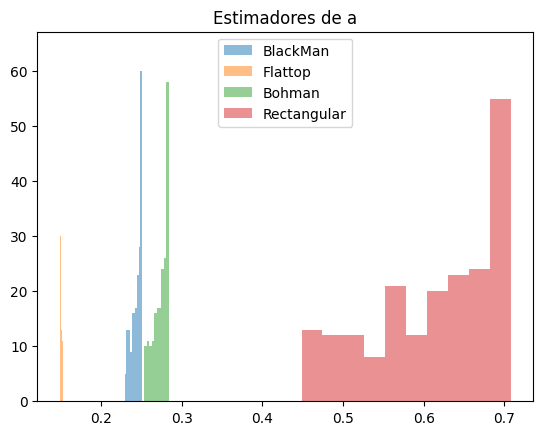

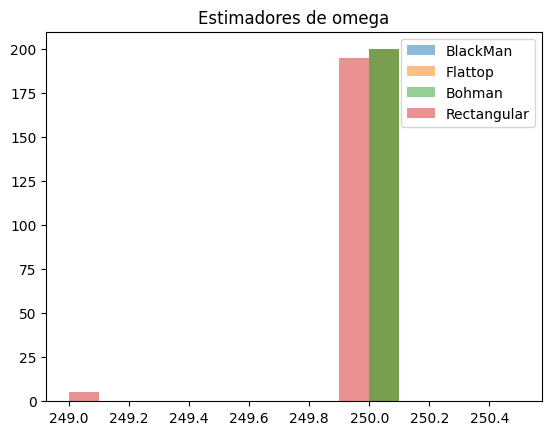

Blackman Harris: 
          ♦ Estimador a =  0.24406418850072698
               Sesgo =  1.440103664105046
               Varianza =  0.035545145183664924
          ♦ Estimador omega1 =  250.0
               Sesgo =  0.25322980980939763
               Varianza =  0.08511081024484664

Flattop: 
          ♦ Estimador a =  0.1506134098753845
               Sesgo =  1.428340869940044
               Varianza =  0.013912004286276132
          ♦ Estimador omega1 =  250.0
               Sesgo =  0.25322980980939763
               Varianza =  0.08511081024484664

Bohman: 
          ♦ Estimador a =  0.2740149078300189
               Sesgo =  1.4446085309348302
               Varianza =  0.04453016641927587
          ♦ Estimador omega1 =  250.0
               Sesgo =  0.25322980980939763
               Varianza =  0.08511081024484664

Rectangular: 
          ♦ Estimador a =  0.6152811095767151
               Sesgo =  1.521850272231837
               Varianza =  0.21402660709062174
          ♦ Est

In [17]:
functs4(10)

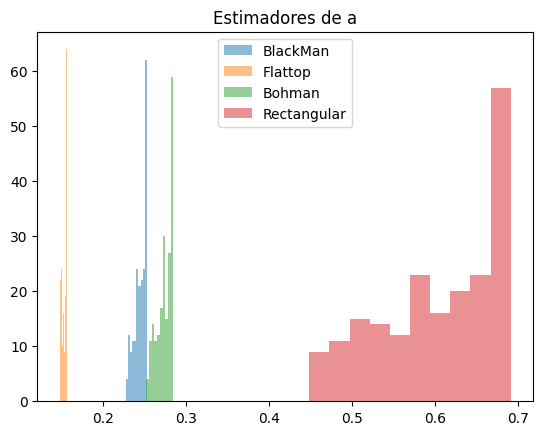

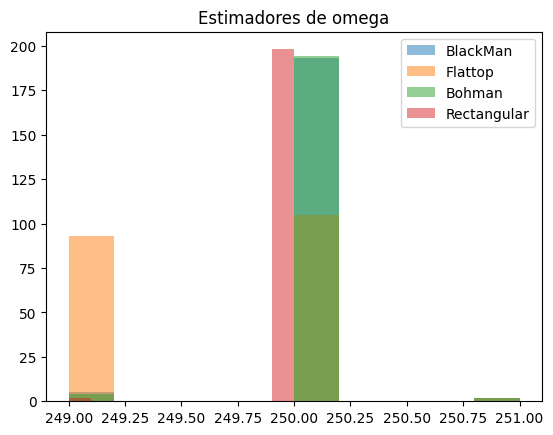

Blackman Harris: 
          ♦ Estimador a =  0.2448542642979364
               Sesgo =  1.4211225316414868
               Varianza =  0.0356856998072302
          ♦ Estimador omega1 =  249.985
               Sesgo =  0.25514223998030827
               Varianza =  0.08543716768161483

Flattop: 
          ♦ Estimador a =  0.15332408528553787
               Sesgo =  1.4180951339379575
               Varianza =  0.013950845307851213
          ♦ Estimador omega1 =  249.545
               Sesgo =  0.47737658631191254
               Varianza =  0.307671514013219

Bohman: 
          ♦ Estimador a =  0.2742542214041299
               Sesgo =  1.4229334073858855
               Varianza =  0.04471771715649062
          ♦ Estimador omega1 =  249.99
               Sesgo =  0.2549196053395643
               Varianza =  0.08521453304087084

Rectangular: 
          ♦ Estimador a =  0.6056968656003799
               Sesgo =  1.4660867493162788
               Varianza =  0.21545932601316692
          ♦ 

In [18]:
functs4(3)

Se puede observar que a través de este método de estimación, no se consigue una muy buena aproximación a la amplitud de la señal, ya que el sesgo que posee es elevado. Sin embargo, en tanto y en cuanto la varianza del mismo sea mínima, como es nuestro caso, es un problema que puede solucionarse facilmente mediante calibración, tratándose no más que de un corrimiento.

Por otro lado, el método de estimación sí parece ser correcto para la frecuencia $\Omega_{1}$, ya que tanto su sesgo como su varianza presentan valores muy próximos a cero. 